In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 4.3MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=eec186c2a689db7533ee8ebaabafaea1f3dab89bc8381ac20766a4dae98716d5
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 3.4MB/s 
     |████████████████████████████████| 983kB 3.5MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=4a0cd0bbc6521f7bfaeb8c8d25f71aeead05e33b959708569b0a935a9ee79cb9
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [ ]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [34]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [35]:
df = pd.read_json('pretty_ml_tweets_complaint.json')
#sample = pd.read_csv('TwitterData.csv')



In [37]:
#Sentiment Analysis
#Vader Sentiment

In [38]:
analyzer = SentimentIntensityAnalyzer()

In [39]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [40]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [41]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [42]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

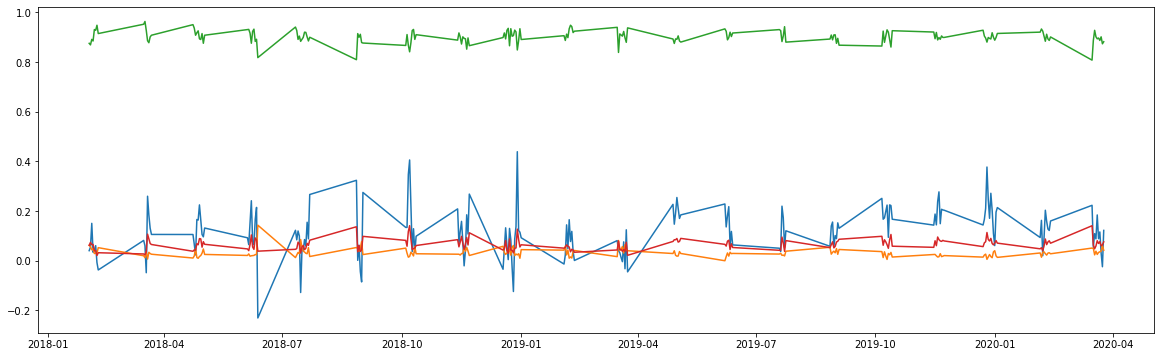

In [43]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [44]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'The Walt Disney Company (DIS) surprised the market with Q1 result. Merrill Lynch changed the rating to Outperform, as The Walt Disney Company (DIS) reported a net revenue that soared 7%.'

In [45]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'JP Morgan y Bank of America Merrill Lynch coinciden en que el entorno actual invita a comprar acciones de riesgo para obtener rentabilidades a futuro. http://bit.ly/2ZPSri9\xa0'

Text(0, 0.5, 'Sentiment')

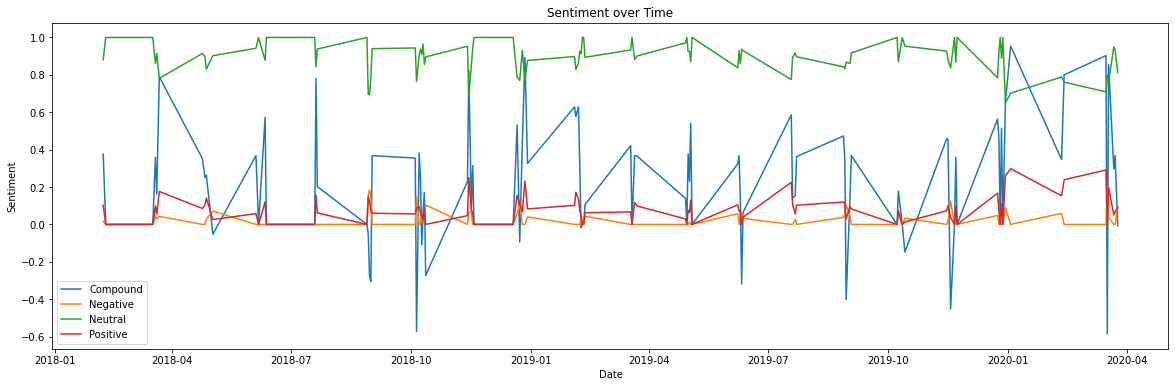

In [46]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

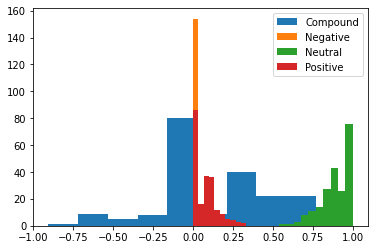

In [47]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

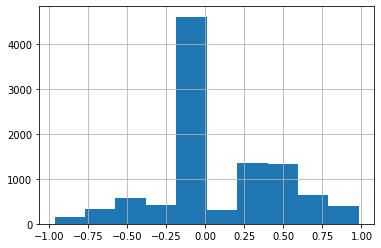

In [48]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [49]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.940,0.060,0.2263
1,0.798,0.090,-0.1027
2,0.622,0.278,0.5719
3,0.808,0.086,-0.1027
4,0.932,0.068,0.2263
...,...,...,...
10173,1.000,0.000,0.0000
10174,0.700,0.144,-0.1531
10175,0.840,0.000,-0.8316
10176,1.000,0.000,0.0000


In [50]:
#Importing Various twitter data
# all JP files
#Complaint
df_= pd.read_json('pretty_ml_tweets_complaint.json')


In [51]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [52]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [53]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 10, 
                                min_df = 1)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(10178, 18127)


In [54]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [55]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [56]:
sentiment_wm = df_['text'].apply(lambda x: analyzer.polarity_scores(x))
df_ = pd.concat([df_, sentiment_wm.apply(pd.Series)],1)

In [57]:
df_.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,The Walt Disney Company (DIS) surprised the ma...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:52:38,2019-09-03 23:52:38,1169035503360008192,/GoldmanSachBOT/status/1169035503360008193,1119063948689596416,EquityMarketPredictor,,0.000,0.940,0.060,0.2263
1,True,[],[https://pbs.twimg.com/media/EDk7DjIXoAE8VPL.jpg],False,False,0,[https://fastinews.com/2019/09/03/its-a-great-...,,0,[],0,FastiNews,"It’s a ‘great time’ to buy risk assets, Bank o...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:32:48,2019-09-03 23:32:48,1169030512159186944,/FastiNews/status/1169030512159186950,1039728124366336000,Fasti News,,0.112,0.798,0.090,-0.1027
2,False,[],[],False,False,1,[https://www.cnbc.com/2019/09/03/its-a-great-t...,,0,[],1,MohamedHawary,It's a 'great time' to buy risk assets: Bank o...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:16:50,2019-09-03 23:16:50,1169026495005831168,/MohamedHawary/status/1169026495005831171,25261709,Mohamed Hawary,,0.100,0.622,0.278,0.5719
3,True,[CNBCStockMarketNews],[https://pbs.twimg.com/media/EDk0mZaX4AAeEna.jpg],False,False,0,[http://dlvr.it/RCQR4h],,0,[],0,feed_stocks,#CNBCStockMarketNews It’s a ‘great time’ to bu...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:04:36,2019-09-03 23:04:36,1169023416151814144,/feed_stocks/status/1169023416151814144,1006334607946649600,Stocks News Feed - Stock News & Stocks Chat,,0.106,0.808,0.086,-0.1027
4,False,[],[],False,False,0,[],,0,[],0,GoldmanSachBOT,Paper Co. (IP) surprised the market with Q2 re...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-09-03 23:02:39,2019-09-03 23:02:39,1169022925271371776,/GoldmanSachBOT/status/1169022925271371779,1119063948689596416,EquityMarketPredictor,,0.000,0.932,0.068,0.2263


In [58]:
df__pos = df_[df_['compound'] >= 0.05]
df__neg = df_[df_['compound'] <= -0.05]
df__neu = df_[( df_['compound'] < 0.05 ) & ( df_['compound'] > -0.05 )]


In [59]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.005598 -0.028894       1        1  10.608418
9      0.013369  0.055005       2        1  10.338911
5      0.056386 -0.048095       3        1  10.130227
8      0.029725 -0.000766       4        1  10.112688
1      0.009335  0.077080       5        1  10.021446
6      0.002781 -0.024580       6        1   9.988012
4     -0.096349 -0.010617       7        1   9.932623
3     -0.001568 -0.001376       8        1   9.847815
7     -0.008593 -0.018716       9        1   9.599408
0      0.000510  0.000960      10        1   9.420451, topic_info=               Term      Freq     Total Category  logprob  loglift
2693     encourages  4.000000  4.000000  Default  30.0000  30.0000
3308            fsc  4.000000  4.000000  Default  29.0000  29.0000
3058           fenn  3.000000  3.000000  Default  28.0000  28.0000
1919        coveted  3.000000  3.000000  Default  27.0000  27.0000
4696         leader  3.000000  3.000000  Default  26.0000  26.0000
...             ...       ...       ...      ...      ...      ...
454            aren  0.690254  1.545428  Topic10  -6.8070   1.5563
298     alternative  0.649374  1.350895  Topic10  -6.8680   1.6298
3586      graduated  0.682888  1.607722  Topic10  -6.8177   1.5060
1727  comprehensive  0.677642  1.827428  Topic10  -6.8254   1.3702
447     arbitration  0.672343  2.198382  Topic10  -6.8332   1.1776

[434 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
16        4  0.775848    abandoned
17        5  0.913829       abbvie
47        5  0.899843  accelerated
86        5  0.739602       acting
91        9  0.528999     activity
...     ...       ...          ...
9061      9  0.958900       xzioyj
9112      4  0.540410        youtu
9113      4  0.635857      youtube
9149      7  0.418259          zoo
9149      9  0.418259          zoo

[415 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 6, 9, 2, 7, 5, 4, 8, 1])

In [60]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.107412 -0.007113       1        1  11.864182
9      0.017626  0.065572       2        1  11.183950
7     -0.000247  0.025710       3        1  10.399594
8      0.023511 -0.062602       4        1  10.193926
6      0.019809 -0.032358       5        1   9.977750
4      0.011631 -0.021261       6        1   9.811147
1      0.014127  0.027350       7        1   9.785971
5      0.012840  0.007194       8        1   9.382381
3      0.002133  0.004466       9        1   9.233349
0      0.005981 -0.006958      10        1   8.167749, topic_info=                   Term      Freq     Total Category  logprob  loglift
4136                peg  4.000000  4.000000  Default  30.0000  30.0000
5                  aapl  4.000000  4.000000  Default  29.0000  29.0000
224                amzn  3.000000  3.000000  Default  28.0000  28.0000
4074              paper  3.000000  3.000000  Default  27.0000  27.0000
187            alphabet  2.000000  2.000000  Default  26.0000  26.0000
...                 ...       ...       ...      ...      ...      ...
5426   stockbrokerfraud  0.434823  1.545110  Topic10  -6.6445   1.2371
6307          yesterday  0.401217  0.947872  Topic10  -6.7249   1.6453
3520             matter  0.413076  1.691068  Topic10  -6.6958   1.0955
2190  finanznachrichten  0.393702  0.992481  Topic10  -6.7438   1.5804
2659            highest  0.401070  1.602906  Topic10  -6.7253   1.1195

[433 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
5         7  0.989859            aapl
7        10  0.685840            aber
22        2  0.639863          abuses
24        6  0.427330         abusive
24        8  0.427330         abusive
...     ...       ...             ...
6187      7  0.848651          widows
6224      5  1.038780             wkn
6232      8  0.659543           women
6318      3  1.088371         youtube
6340      7  1.084023  zementkonzerns

[318 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 10, 8, 9, 7, 5, 2, 6, 4, 1])

In [61]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df__neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.020889  0.023001       1        1  10.902740
2      0.094008 -0.040413       2        1  10.400689
1     -0.001488  0.086234       3        1  10.374297
3     -0.060818 -0.065300       4        1  10.306403
4     -0.017476  0.009460       5        1   9.842632
7      0.018682 -0.019475       6        1   9.835842
5     -0.027510 -0.019880       7        1   9.599718
9      0.009924 -0.000749       8        1   9.592300
0     -0.024867  0.016788       9        1   9.582338
8     -0.011344  0.010335      10        1   9.563040, topic_info=                 Term      Freq     Total Category  logprob  loglift
2400         diletant  4.000000  4.000000  Default  30.0000  30.0000
9890             zozo  3.000000  3.000000  Default  29.0000  29.0000
3339            files  3.000000  3.000000  Default  28.0000  28.0000
8646              sxx  3.000000  3.000000  Default  27.0000  27.0000
9512             voya  3.000000  3.000000  Default  26.0000  26.0000
...               ...       ...       ...      ...      ...      ...
9033   transportation  1.017834  1.865301  Topic10  -6.4922   1.7415
7326              rbc  1.072434  2.458055  Topic10  -6.4399   1.5178
9247       university  0.909012  1.903857  Topic10  -6.6052   1.6080
6702  pharmaceuticals  0.867910  1.762234  Topic10  -6.6515   1.6390
8633         swarmapp  0.850448  1.526188  Topic10  -6.6718   1.7625

[400 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1         5  0.806681       aam
4         6  0.899586      aaxn
11        8  0.656910  abdicate
49        2  1.048953   acelera
97        4  0.571068       add
...     ...       ...       ...
9785      4  0.766673    yields
9839      4  0.871015  yxkjdljt
9878      8  0.808191      znak
9882      7  0.688171    zoetis
9890      5  1.001149      zozo

[381 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 2, 4, 5, 8, 6, 10, 1, 9])

In [62]:
print(df__pos.shape)
print(df__neg.shape)
print(df__neu.shape)

(4024, 25)
(1772, 25)
(4382, 25)
